In [26]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization


In [14]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"/content/DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")
validation_generator = test_datagen.flow_from_directory(
			"/content/DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [15]:
model = Sequential()

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layers 3-----------------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Flatten())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Fully Connected Layer 1----------------
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 2----------------
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 3----------------
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))

#Compile Model---------------------------
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

#Fit model on the loaded dataset---------
res=model.fit(
		trainGenerator,
		epochs = 25,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432
		)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2444/2444 ━━━━━━━━━━━━━━━━━━━━ 163s 64ms/step - accuracy: 0.6216 - loss: 1.4497 - val_accuracy: 0.9523 - val_loss: 0.1504
Epoch 2/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 200s 64ms/step - accuracy: 0.9028 - loss: 0.3124 - val_accuracy: 0.9567 - val_loss: 0.1362
Epoch 3/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 200s 63ms/step - accuracy: 0.9256 - loss: 0.2393 - val_accuracy: 0.9662 - val_loss: 0.1044
Epoch 4/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 202s 63ms/step - accuracy: 0.9385 - loss: 0.1994 - val_accuracy: 0.9730 - val_loss: 0.0884
Epoch 5/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 204s 64ms/step - accuracy: 0.9444 - loss: 0.1783 - val_accuracy: 0.9759 - val_loss: 0.0798
Epoch 6/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 201s 63ms/step - accuracy: 0.9513 - loss: 0.1580 - val_accuracy: 0.9583 - val_loss: 0.1277
Epoch 7/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 202s 64ms/step - accuracy: 0.9549 - loss: 0.1480 - val_accuracy: 0.9804 - val_loss: 0.0613
Epoch 8/25
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 155s 64ms/step - accuracy: 0.9581 - lo

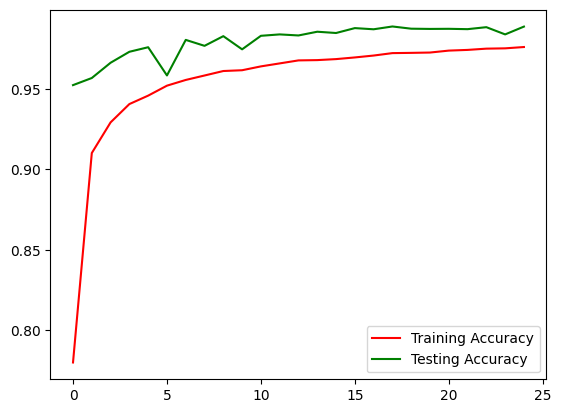

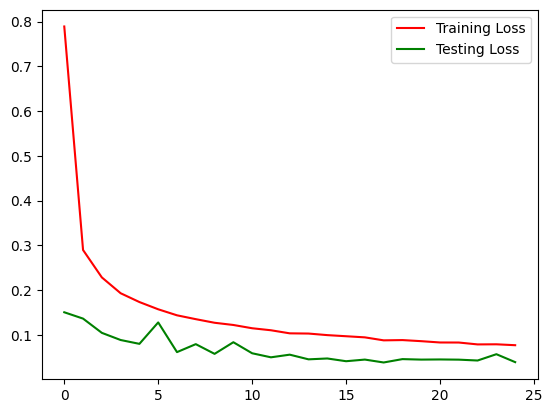

In [19]:
%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

model.save('hindiocr.keras')

Test Image 1 :-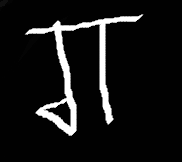

In [32]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2

''' ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
labels =['yna', 't`aa', 't`haa', 'd`aa', 'd`haa', 'a`dna', 'ta', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'sha', 'shat', 'sa', 'ha', 'aksha', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
'''
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
#
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread("/content/test.PNG")
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)

import tensorflow as tf
model = tf.keras.models.load_model("/content/hindiocr.keras")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
The letter is  ग


Test Image 2 :- 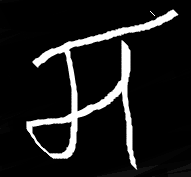

In [33]:
test_image = cv2.imread("/content/test2.png")
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)

import tensorflow as tf
model = tf.keras.models.load_model("/content/hindiocr.keras")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
The letter is  म
